# Семинар 4. Итоговая практическая работа.

## Задача 1:

### 1.1 Скачать данные по ссылке:
https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [99]:
df = pd.read_csv('kc_house_data (2).csv')

_____________
### 1.2 Изучите стоимости недвижимости  :

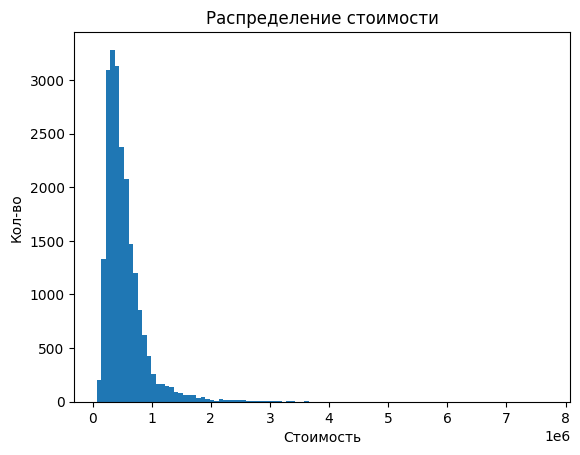

In [100]:
plt.hist(df['price'], bins= 100)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

Стоимость большинства домов лежат в диапазоне ~ от 200 000 до 600 000 у.е
______________

### 1.3 Изучите распределение квадратуры жилой площади:

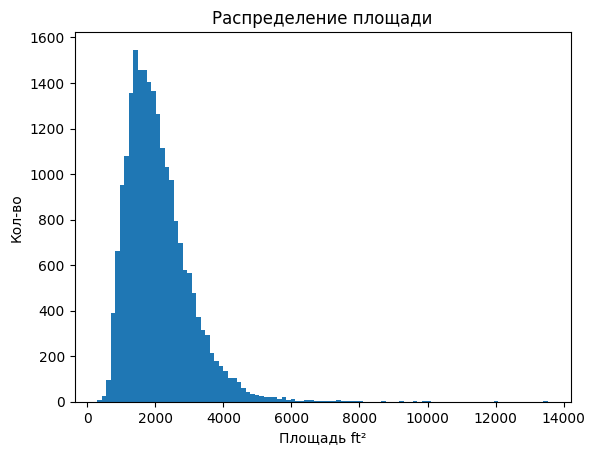

In [101]:
plt.hist(df['sqft_living'], bins= 100)
plt.title('Распределение площади')
plt.xlabel('Площадь ft²')
plt.ylabel('Кол-во');

Площадь большинства домов лежит в диапазоне ~ от 1000 до 3000 ft²
_______

### 1.4 Изучите распределение года постройки:

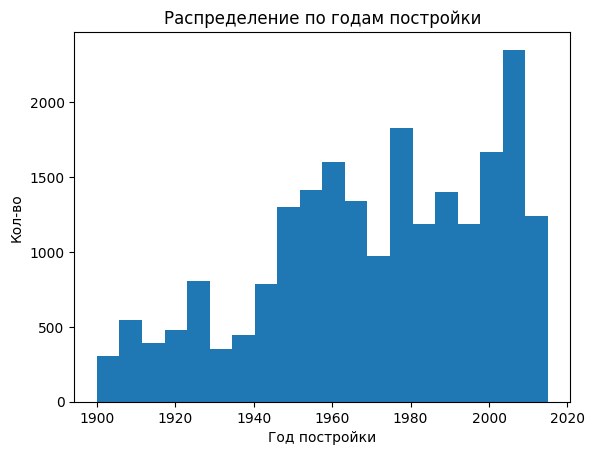

In [102]:
plt.hist(df['yr_built'], bins= 20)
plt.title('Распределение по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

Большинство домов построены после 1944 года.  
Так же, мы наблюдаем закономерность, чем позже дата тем больше домов было построено.
_________

## Задача 2:

### 2.1 Изучите распределение домов от наличия вида на набережную: 

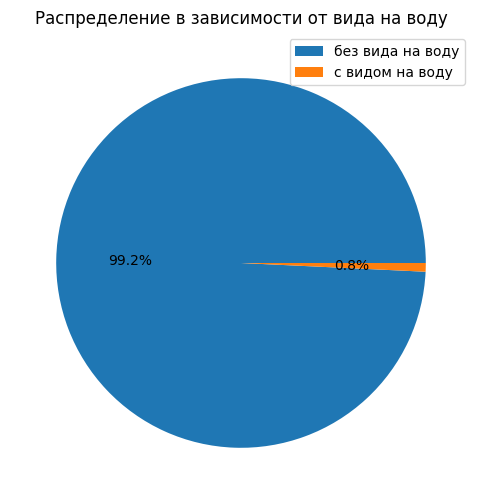

In [103]:
dt = df['waterfront'].apply(lambda x: "без вида на воду" if x == 0 else "c видом на воду").value_counts()

plt.figure(figsize=(6, 6))
plt.title("Распределение в зависимости от вида на воду")
plt.pie(dt.values,autopct='%.1f%%',)
plt.legend(labels= dt.index, loc='best');

Вид на воду есть у малого количества домов, менее 1 процента имеют вид на воду.
_______________


### 2.2 Изучите распределение этажей домов:

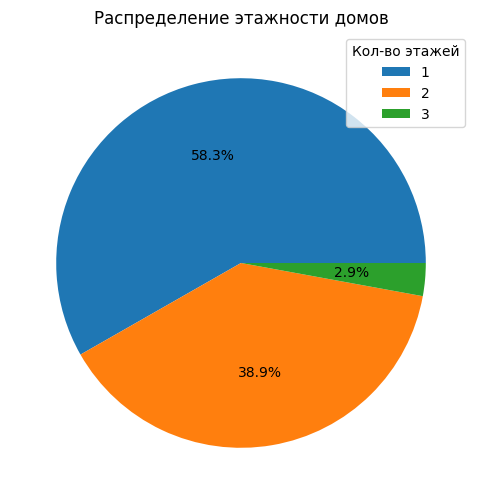

In [104]:
dt = df['floors'].astype('int').value_counts()
plt.figure(figsize=(6, 6))
plt.title('Распределение этажности домов')
plt.pie(dt.values, autopct='%.1f%%', )
plt.legend(labels= dt.index, title='Кол-во этажей', loc='best');


Больше всего одноэтажных домов 58%,  
Меньше всего трехэтажных домов, таких менее 3% 
________________________

### 2.3 Изучите распределение состояния домов:

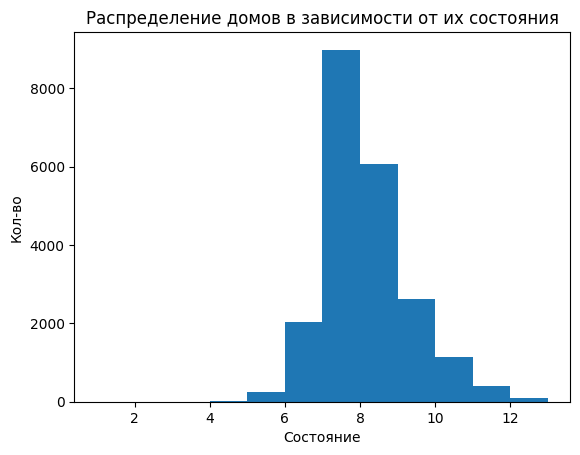

In [105]:
plt.title('Распределение домов в зависимости от их состояния')
plt.xlabel('Состояние')
plt.ylabel('Кол-во')
plt.hist(df['grade'], bins= 12);

Судя по графику видно что большее количество лежит в диапазоне оценки от 7 до 9 баллов,  
можем сделать вывод что большинство домов имеют оценку выше среднего.
____________________________

## Задача 3:

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [106]:
df_for_matrix = df.drop(columns=['id', 'sqft_living15', 'sqft_lot15', 'date'])
df_for_matrix['bathrooms'] = df_for_matrix['bathrooms'].astype('int')
df_for_matrix['floors'] = df_for_matrix['floors'].astype('int')

In [107]:
corr_matrix = df_for_matrix.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.00,0.31,0.51,0.70,0.00,0.24,0.27,0.40,0.00,0.67,0.61,0.32,0.00,0.13,0.00,0.31,0.00
bedrooms,0.31,1.00,0.47,0.58,0.00,0.16,0.00,0.00,0.00,0.36,0.48,0.30,0.15,0.00,-0.15,0.00,0.13
bathrooms,0.51,0.47,1.00,0.70,0.00,0.48,0.00,0.18,-0.13,0.61,0.64,0.25,0.43,0.00,-0.16,0.00,0.18
sqft_living,0.70,0.58,0.70,1.00,0.17,0.35,0.10,0.28,0.00,0.76,0.88,0.44,0.32,0.00,-0.20,0.00,0.24
sqft_lot,0.00,0.00,0.00,0.17,1.00,0.00,0.00,0.00,0.00,0.11,0.18,0.00,0.00,0.00,-0.13,0.00,0.23
floors,0.24,0.16,0.48,0.35,0.00,1.00,0.00,0.00,-0.29,0.47,0.52,-0.24,0.58,0.00,-0.10,0.00,0.16
waterfront,0.27,0.00,0.00,0.10,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.40,0.00,0.18,0.28,0.00,0.00,0.40,1.00,0.00,0.25,0.17,0.28,0.00,0.10,0.00,0.00,0.00
condition,0.00,0.00,-0.13,0.00,0.00,-0.29,0.00,0.00,1.00,-0.14,-0.16,0.17,-0.36,0.00,0.00,0.00,-0.11
grade,0.67,0.36,0.61,0.76,0.11,0.47,0.00,0.25,-0.14,1.00,0.76,0.17,0.45,0.00,-0.18,0.11,0.20


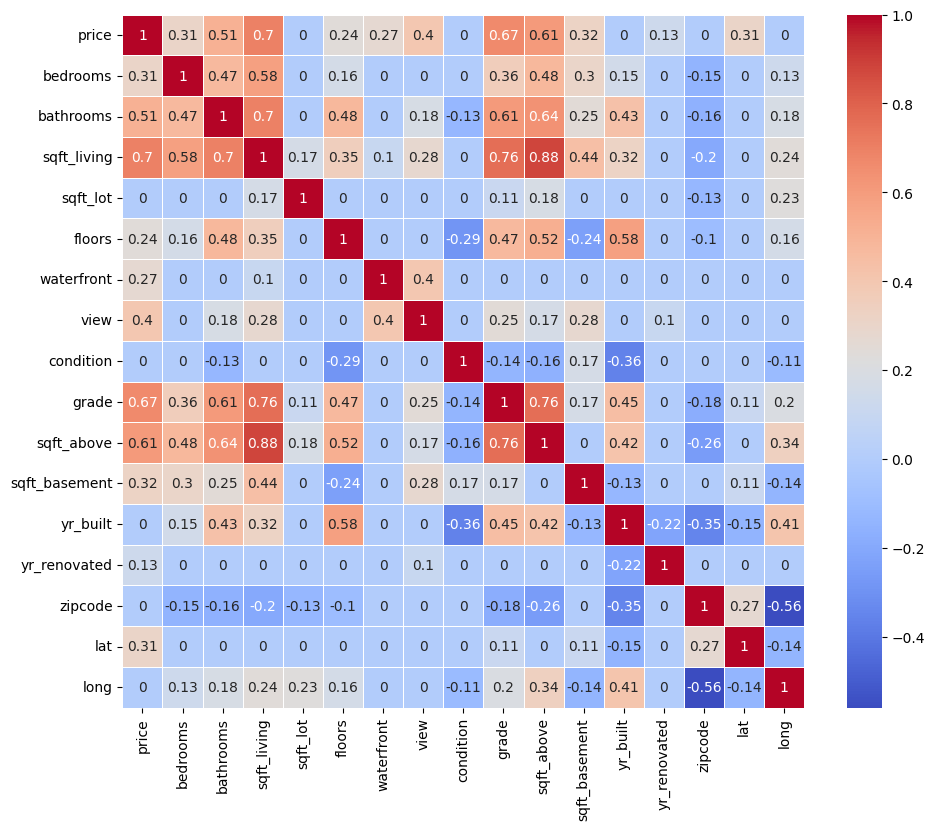

In [108]:
plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

________________

Визуализируем линейную зависимость цены и жилой площади:

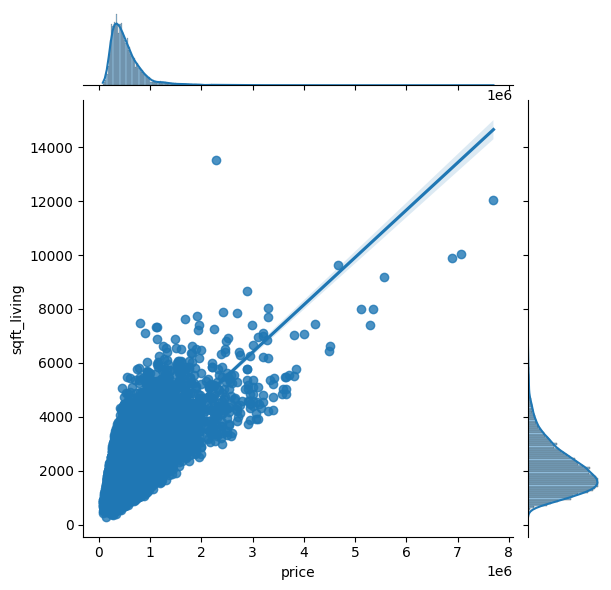

In [109]:
sns.jointplot(x=df_for_matrix['price'], y=df_for_matrix['sqft_living'], kind='reg');

Наблюдаем  линейную зависимость, и делаем вывод:  
чем больше жилая площадь, тем выше стоимость.
_____________

Проверим как класс дома влияет на стоимость:

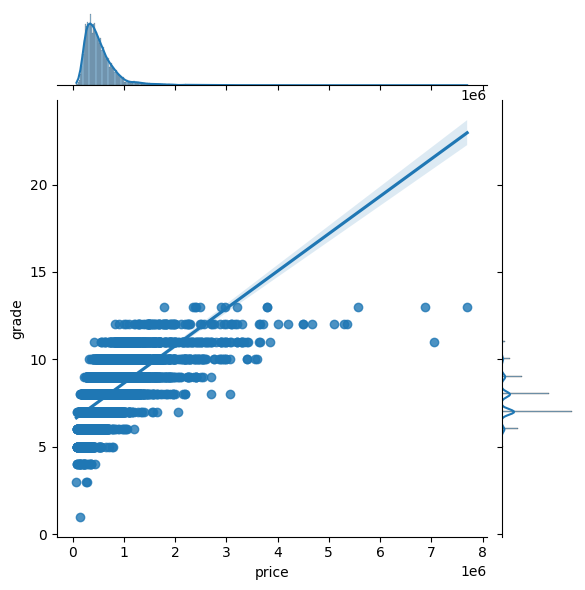

In [110]:
sns.jointplot(x=df_for_matrix['price'], y=df['grade'], kind='reg');

Наблюдаем линейную зависимость, следовательно чем выше касс, тем выше стоимость.

______________


Убедимся что состояние дома явно не влияет на стоимость домов:

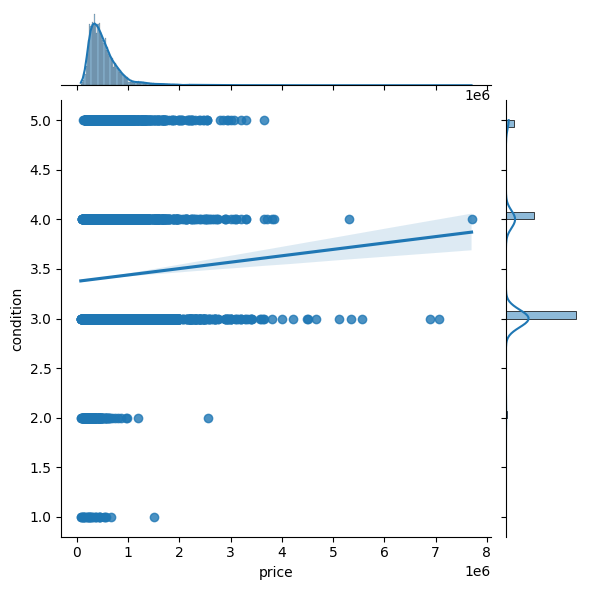

In [111]:
sns.jointplot(x=df_for_matrix['price'], y=df['condition'], kind='reg');

Наблюдаем отсутствие линейной зависимость, следовательно, состояние на прямую не влияет на стоимость домов.
________________

Проверим распределение цен в зависимости от класса:

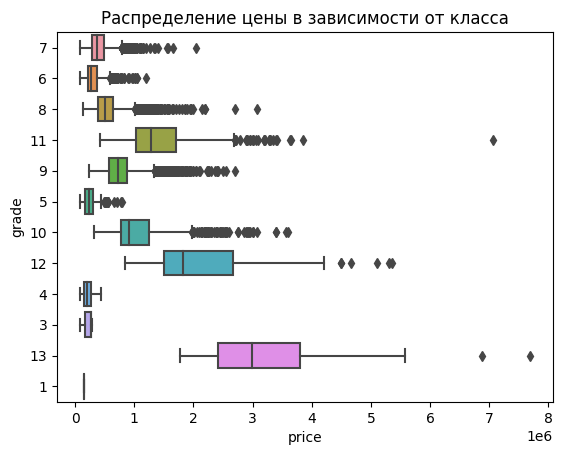

In [112]:
sns.boxplot(x=df_for_matrix['price'], y=df_for_matrix['grade'].astype('str'), whis=1.5);
plt.title('Распределение цены в зависимости от класса');

Наибольшую стоимость имеют дома с оценкой 13
_________

Проверим распределение цен в зависимости от вида их окон:

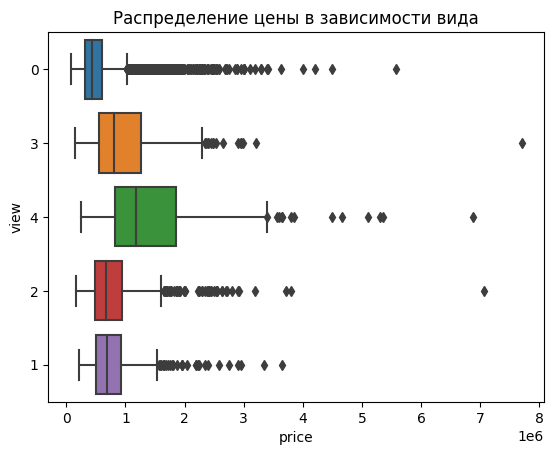

In [113]:
sns.boxplot(x=df_for_matrix['price'], y=df_for_matrix['view'].astype('str'), whis=1.5)
plt.title('Распределение цены в зависимости вида');

Наибольшую стоимость имеют дома с видом 4.